# 划分训练集和测试集

In [1]:
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
# 挑选训练集和测试集
import sklearn.model_selection as ms

Accuracy:98.0%


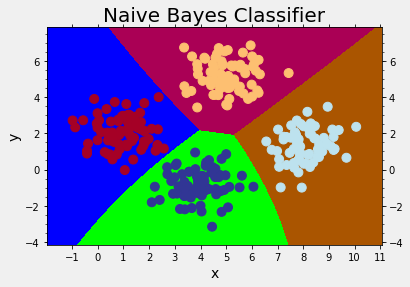

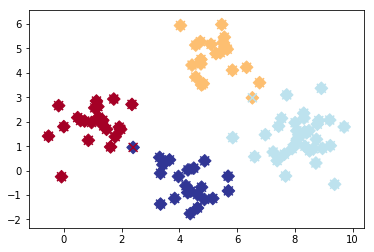

In [4]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y)

def train_model(x,y):
    model = nb.GaussianNB()
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('Naive Bayes Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(axis='y',linestyle=':')
    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='brg')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_train(train_x,train_y):
    mp.scatter(train_x[:,0],train_x[:,1],c=train_y,
               cmap='RdYlBu',s=80)
    mp.show()
    
def draw_test(test_x,test_y,pred_test_y):
    # marker='D'是菱形
    mp.scatter(test_x[:,0],test_x[:,1],marker='D',
              c=test_y,cmap='RdYlBu',s=80)
    mp.scatter(test_x[:,0],test_x[:,1],marker='x',
              c=pred_test_y,cmap='RdYlBu',s=80)
    
def main():
    x,y = read_data('multiple1.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_ac(test_y,pred_test_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_train(train_x,train_y)
    draw_test(test_x,test_y,pred_test_y)
    
    return 0

if __name__ == '__main__':
    main()
    


# 使用交叉验证法

0.99 0.99 1.0 0.99
Accuracy:98.0%


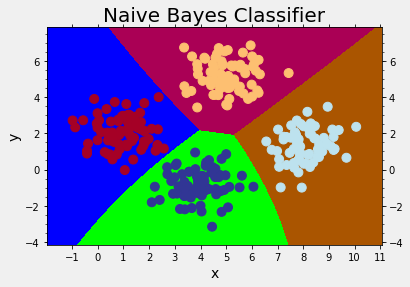

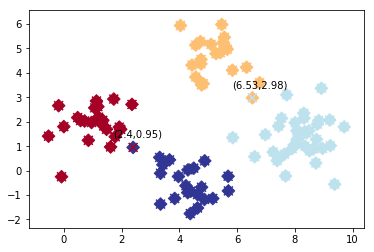

In [25]:
def read_data(filename):
    x,y = [],[]
    with open(filename,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
    return np.array(x),np.array(y)

def train_model(x,y):
    model = nb.GaussianNB()
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

def eval_cv(model,x,y):
    # cv=10 表示总共交叉验证10次，交叉验证得分
    f1 = ms.cross_val_score(model,x,y,cv=10,
                      scoring='f1_weighted')
    rc = ms.cross_val_score(model,x,y,cv=10,
                       scoring='recall_weighted')
    pc = ms.cross_val_score(model,x,y,cv=10,
                       scoring='precision_weighted')
    ac = ms.cross_val_score(model,x,y,cv=10,
                        scoring='accuracy')
    print(round(f1.mean(),2),round(rc.mean(),2),
          round(pc.mean(),2),round(ac.mean(),2))
    

# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    
def init_chart():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.title('Naive Bayes Classifier',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator())
    ax.yaxis.set_minor_locator(mp.MultipleLocator(0.5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(axis='y',linestyle=':')
    
def draw_grid(grid_x,grid_y):
    mp.pcolormesh(grid_x[0],grid_x[1],grid_y,cmap='brg')
    mp.xlim(grid_x[0].min(),grid_x[0].max())
    mp.ylim(grid_x[1].min(),grid_x[1].max())
    
def draw_train(train_x,train_y):
    mp.scatter(train_x[:,0],train_x[:,1],c=train_y,
               cmap='RdYlBu',s=80)
    mp.show()
    
def draw_test(test_x,test_y,pred_test_y):
    # marker='D'是菱形
    mp.scatter(test_x[:,0],test_x[:,1],marker='D',
              c=test_y,cmap='RdYlBu',s=80)
    mp.scatter(test_x[:,0],test_x[:,1],marker='x',
              c=pred_test_y,cmap='RdYlBu',s=80)
    for x1,x2,i in zip(test_x[:,0],test_x[:,1],range(len(test_x[:,0]))):
        # print(int(index))
        if (test_y[i] != pred_test_y[i]):
            mp.annotate("(%s,%s)"%(x1,x2),xy=(x1,x2),
                       xytext=(-20,10),textcoords='offset points')
        
    
def main():
    x,y = read_data('multiple1.txt')
    l,r,h = x[:,0].min()-1,x[:,0].max()+1,0.005
    b,t,v = x[:,1].min()-1,x[:,1].max()+1,0.005
    # 训练测试分离,随机度为5
    train_x,test_x,train_y,test_y = ms.train_test_split(
        x,y,test_size=0.25,random_state=5)
    model = train_model(train_x,train_y)
    eval_cv(model,x,y)
    grid_x = np.meshgrid(np.arange(l,r,h),
                         np.arange(b,t,v))
    # print(grid_x)
    grid_y = pred_model(model,
                       np.c_[grid_x[0].ravel(),
                            grid_x[1].ravel()]).reshape(grid_x[0].shape)
    # print(grid_y)
    pred_test_y = pred_model(model,test_x)
    eval_ac(test_y,pred_test_y)
    init_chart()
    draw_grid(grid_x,grid_y)
    draw_train(train_x,train_y)
    draw_test(test_x,test_y,pred_test_y)
    
    return 0

if __name__ == '__main__':
    main()
    

In [14]:
a= np.array([0,1,2])